In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import koreanize_matplotlib

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

In [3]:
file_path = './data/'
df = pd.read_csv(f"{file_path}police_data.csv")
df.head()

,접수부서,접수완료일시,경찰청구분,사건상태,사건종류,신고자 성별,발생지점,발생지 위도,발생지 경도,동일사건여부,연도,월,연월,요일,시간대,일자
0,대전청,2020-01-01 00:00:07,대전청,종결요청,상담문의,불상,대전광역시 중구 목동(행정:목동) 360,127.409270,36.333010,Y,2020,1,2020-01,수,0,2020-01-01
1,충남청,2020-01-01 00:00:08,충남청,종결요청,자살,불상,충청북도 청주시 흥덕구 비하동(행정:강서1동) 300,127.420740,36.640520,Y,2020,1,2020-01,수,0,2020-01-01
2,충남청,2020-01-01 00:00:29,충남청,종결요청,무전취식승차,불상,충청남도 당진시 대덕동(행정:당진2동) 1442,126.631965,36.886277,NaN,2020,1,2020-01,수,0,2020-01-01
3,대전청,2020-01-01 00:00:39,대전청,종결요청,상담문의,불상,NaN,127.404663,36.341685,NaN,2020,1,2020-01,수,0,2020-01-01
4,충남청,2020-01-01 00:00:51,충남청,종결요청,폭력,불상,충청남도 당진시 송악읍 기지시리(송악읍) 510,126.695258,36.900175,NaN,2020,1,2020-01,수,0,2020-01-01


In [4]:
df = df[df['사건종류'] == '보이스피싱']

In [5]:
df.head()

,접수부서,접수완료일시,경찰청구분,사건상태,사건종류,신고자 성별,발생지점,발생지 위도,발생지 경도,동일사건여부,연도,월,연월,요일,시간대,일자
3846,충남청,2020-01-02 09:33:49,충남청,종결요청,보이스피싱,불상,충청남도 천안시 서북구 차암동(부성2동) 524,127.104436,36.841583,NaN,2020,1,2020-01,목,9,2020-01-02
3865,충남청,2020-01-02 09:42:45,충남청,종결요청,보이스피싱,불상,충청남도 아산시 풍기동(행정:온양6동) 404-33,127.021875,36.771208,NaN,2020,1,2020-01,목,9,2020-01-02
3960,충남청,2020-01-02 10:23:29,충남청,종결요청,보이스피싱,불상,충청남도 서산시 대산읍 대산리(행정:대산읍) 688-1,126.426100,36.947617,NaN,2020,1,2020-01,목,10,2020-01-02
4016,대전청,2020-01-02 10:46:31,대전청,종결요청,보이스피싱,불상,대전광역시 유성구 대정동(행정:진잠동) 1-4,127.336373,36.317773,NaN,2020,1,2020-01,목,10,2020-01-02
4049,충남청,2020-01-02 11:00:20,충남청,종결요청,보이스피싱,불상,충청남도 논산시 내동(행정:취암동) 1113,127.104068,36.182762,NaN,2020,1,2020-01,목,11,2020-01-02


In [6]:
df.tail()

,접수부서,접수완료일시,경찰청구분,사건상태,사건종류,신고자 성별,발생지점,발생지 위도,발생지 경도,동일사건여부,연도,월,연월,요일,시간대,일자
3844545,충남청,2023-01-18 12:44:04,충남청,종결요청,보이스피싱,여성,NaN,NaN,NaN,NaN,2023,1,2023-01,수,12,2023-01-18
3844678,충남청,2023-01-18 13:31:19,충남청,종결요청,보이스피싱,불상,NaN,NaN,NaN,NaN,2023,1,2023-01,수,13,2023-01-18
3845173,대전청,2023-01-18 16:17:02,대전청,종결요청,보이스피싱,여성,대전광역시 대덕구 신일동 (행정:목상동 ) 1687-6,127.406900,36.437929,NaN,2023,1,2023-01,수,16,2023-01-18
3845654,충남청,2023-01-18 18:38:01,세종청,종결요청,보이스피싱,여성,세종특별자치시 세종시 연서면 봉암리(연서면 ) 54-89,127.284535,36.565027,Y,2023,1,2023-01,수,18,2023-01-18
3845853,대전청,2023-01-18 19:48:01,대전청,종결요청,보이스피싱,남성,NaN,127.404663,36.341685,NaN,2023,1,2023-01,수,19,2023-01-18


# 위치 데이터 EDA

## 접수부서 EDA

In [7]:
df['접수부서'].value_counts()

충남청    35001
대전청    11233
세종청       34
Name: 접수부서, dtype: int64

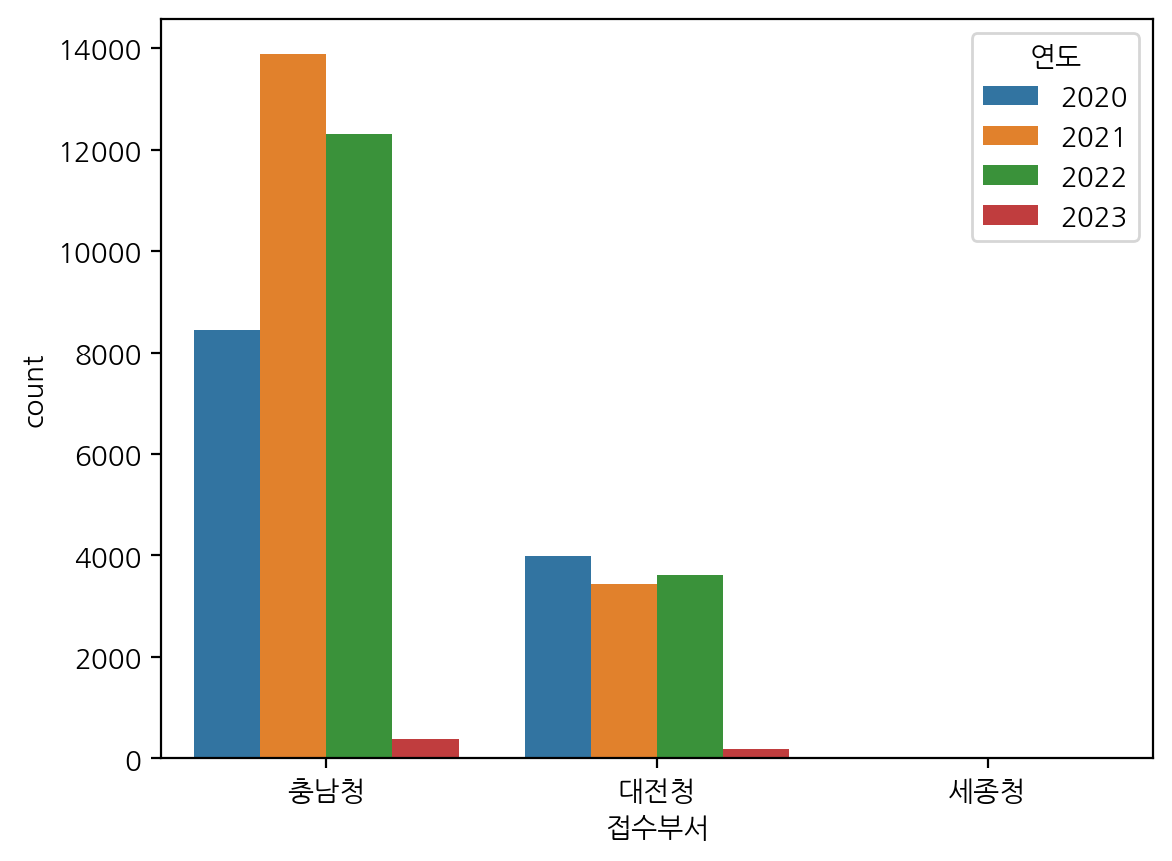

In [8]:
sns.countplot(data=df, x='접수부서', hue='연도');

## 발생지 EDA

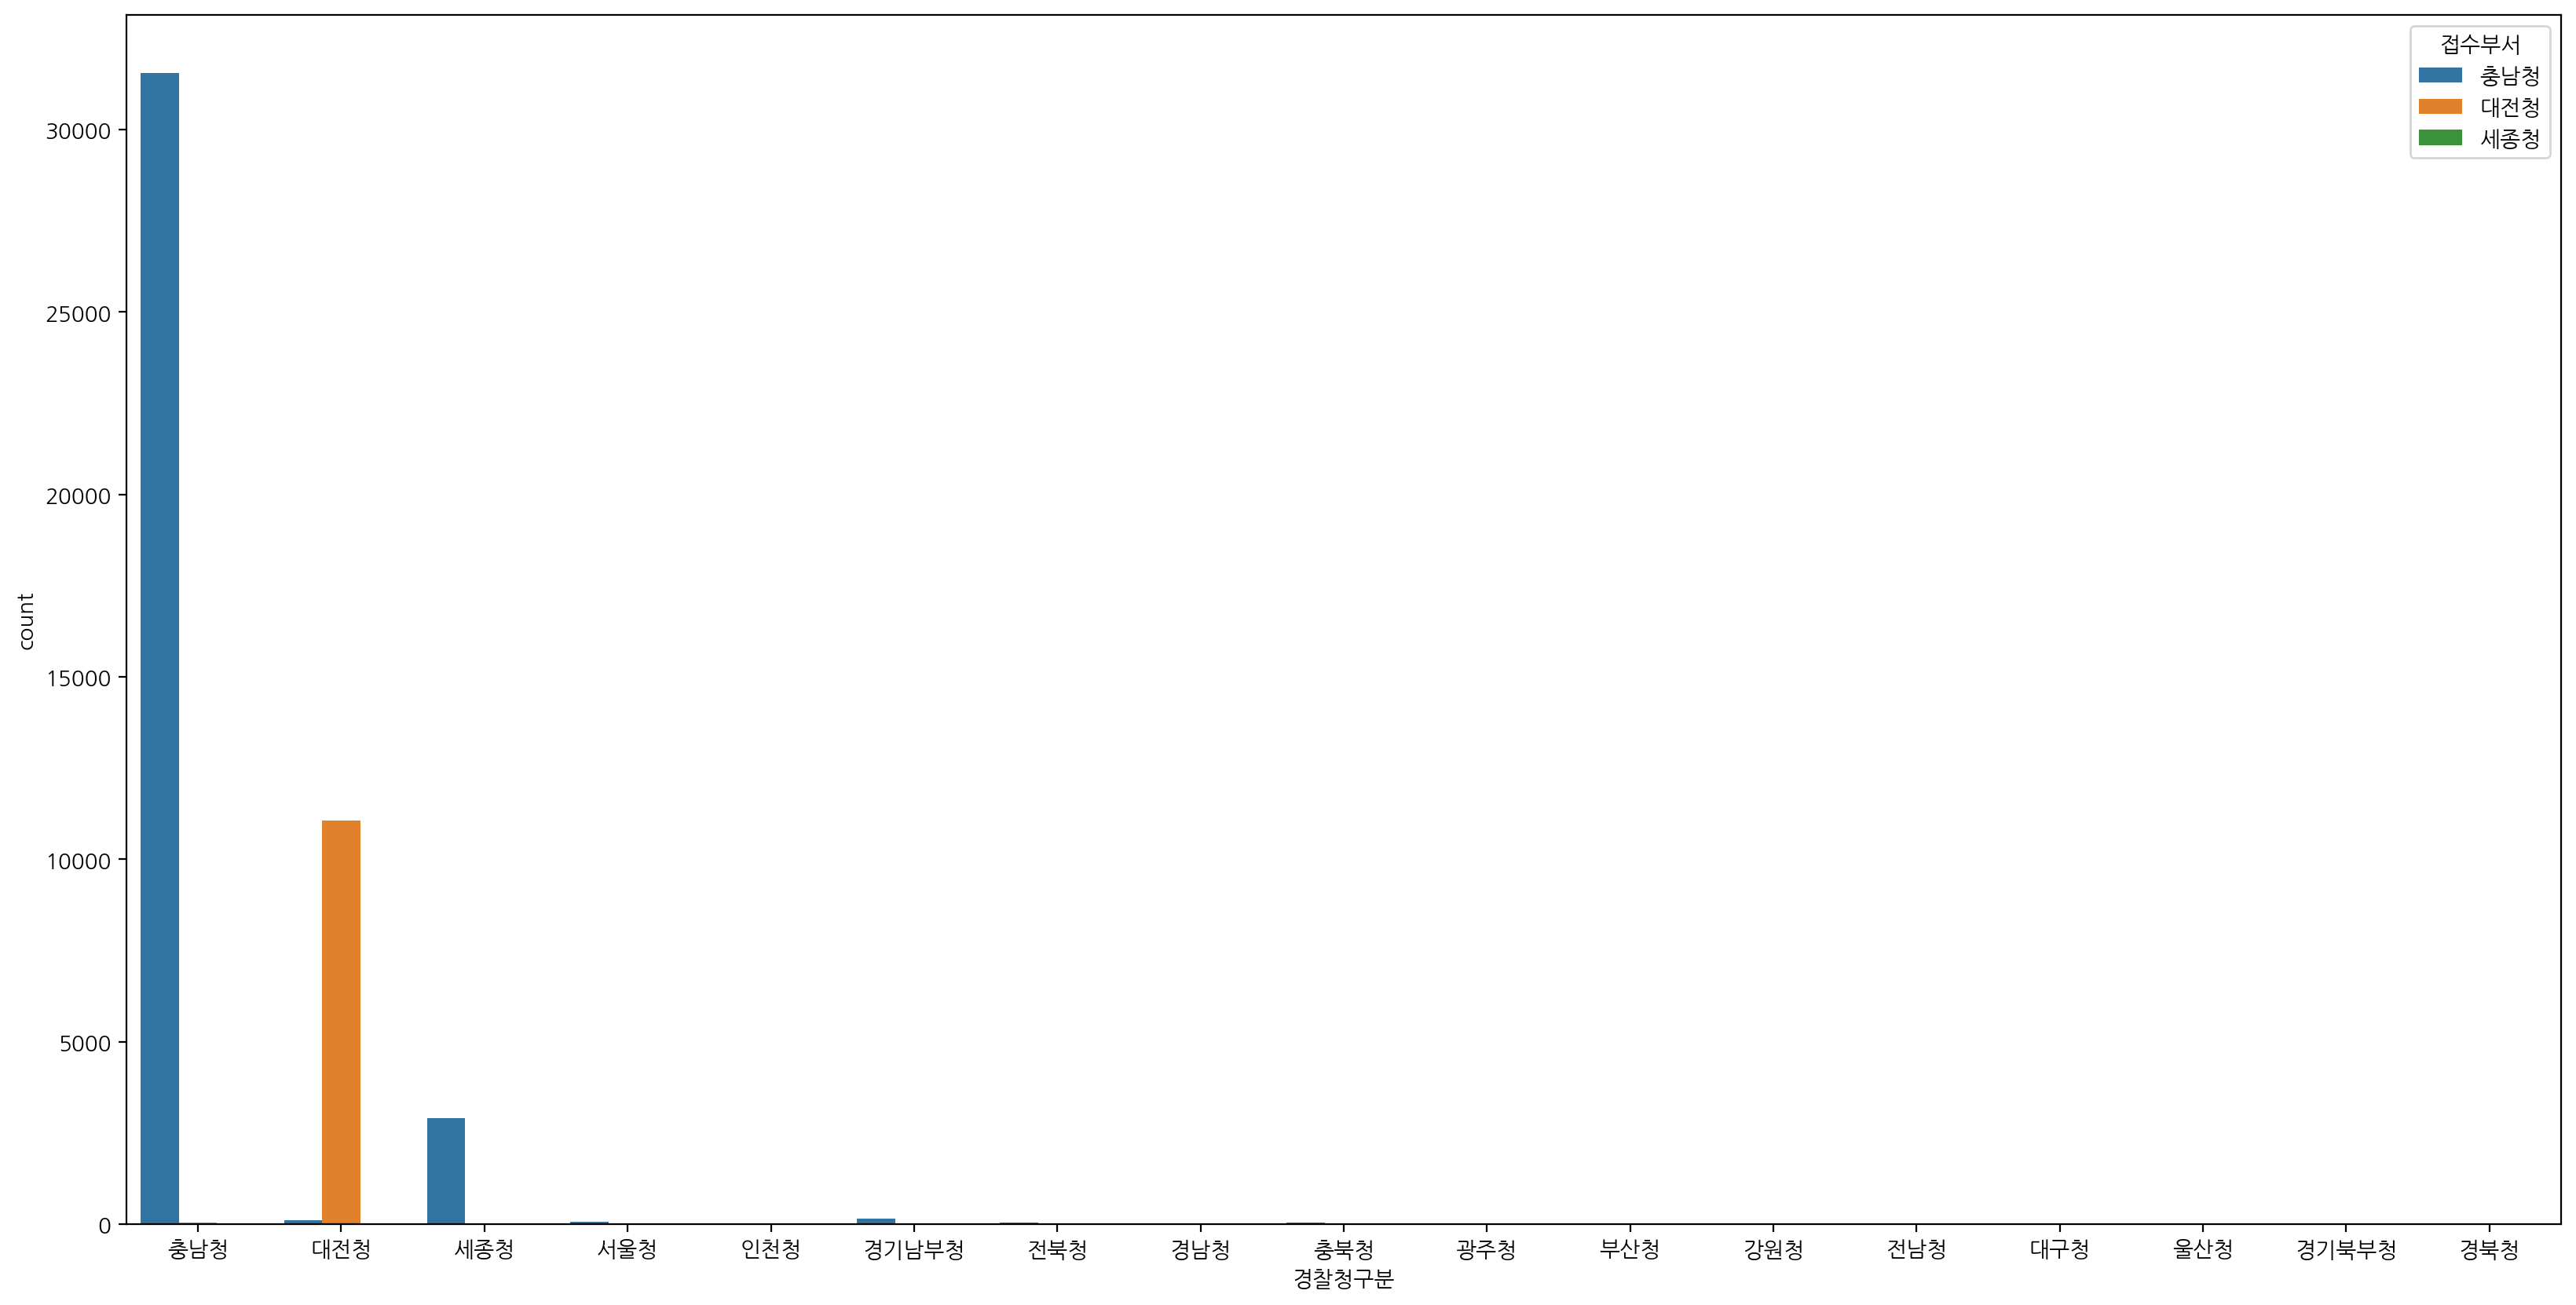

In [9]:
plt.figure(figsize=(20, 10))
sns.countplot(data=df, x='경찰청구분', hue='접수부서');

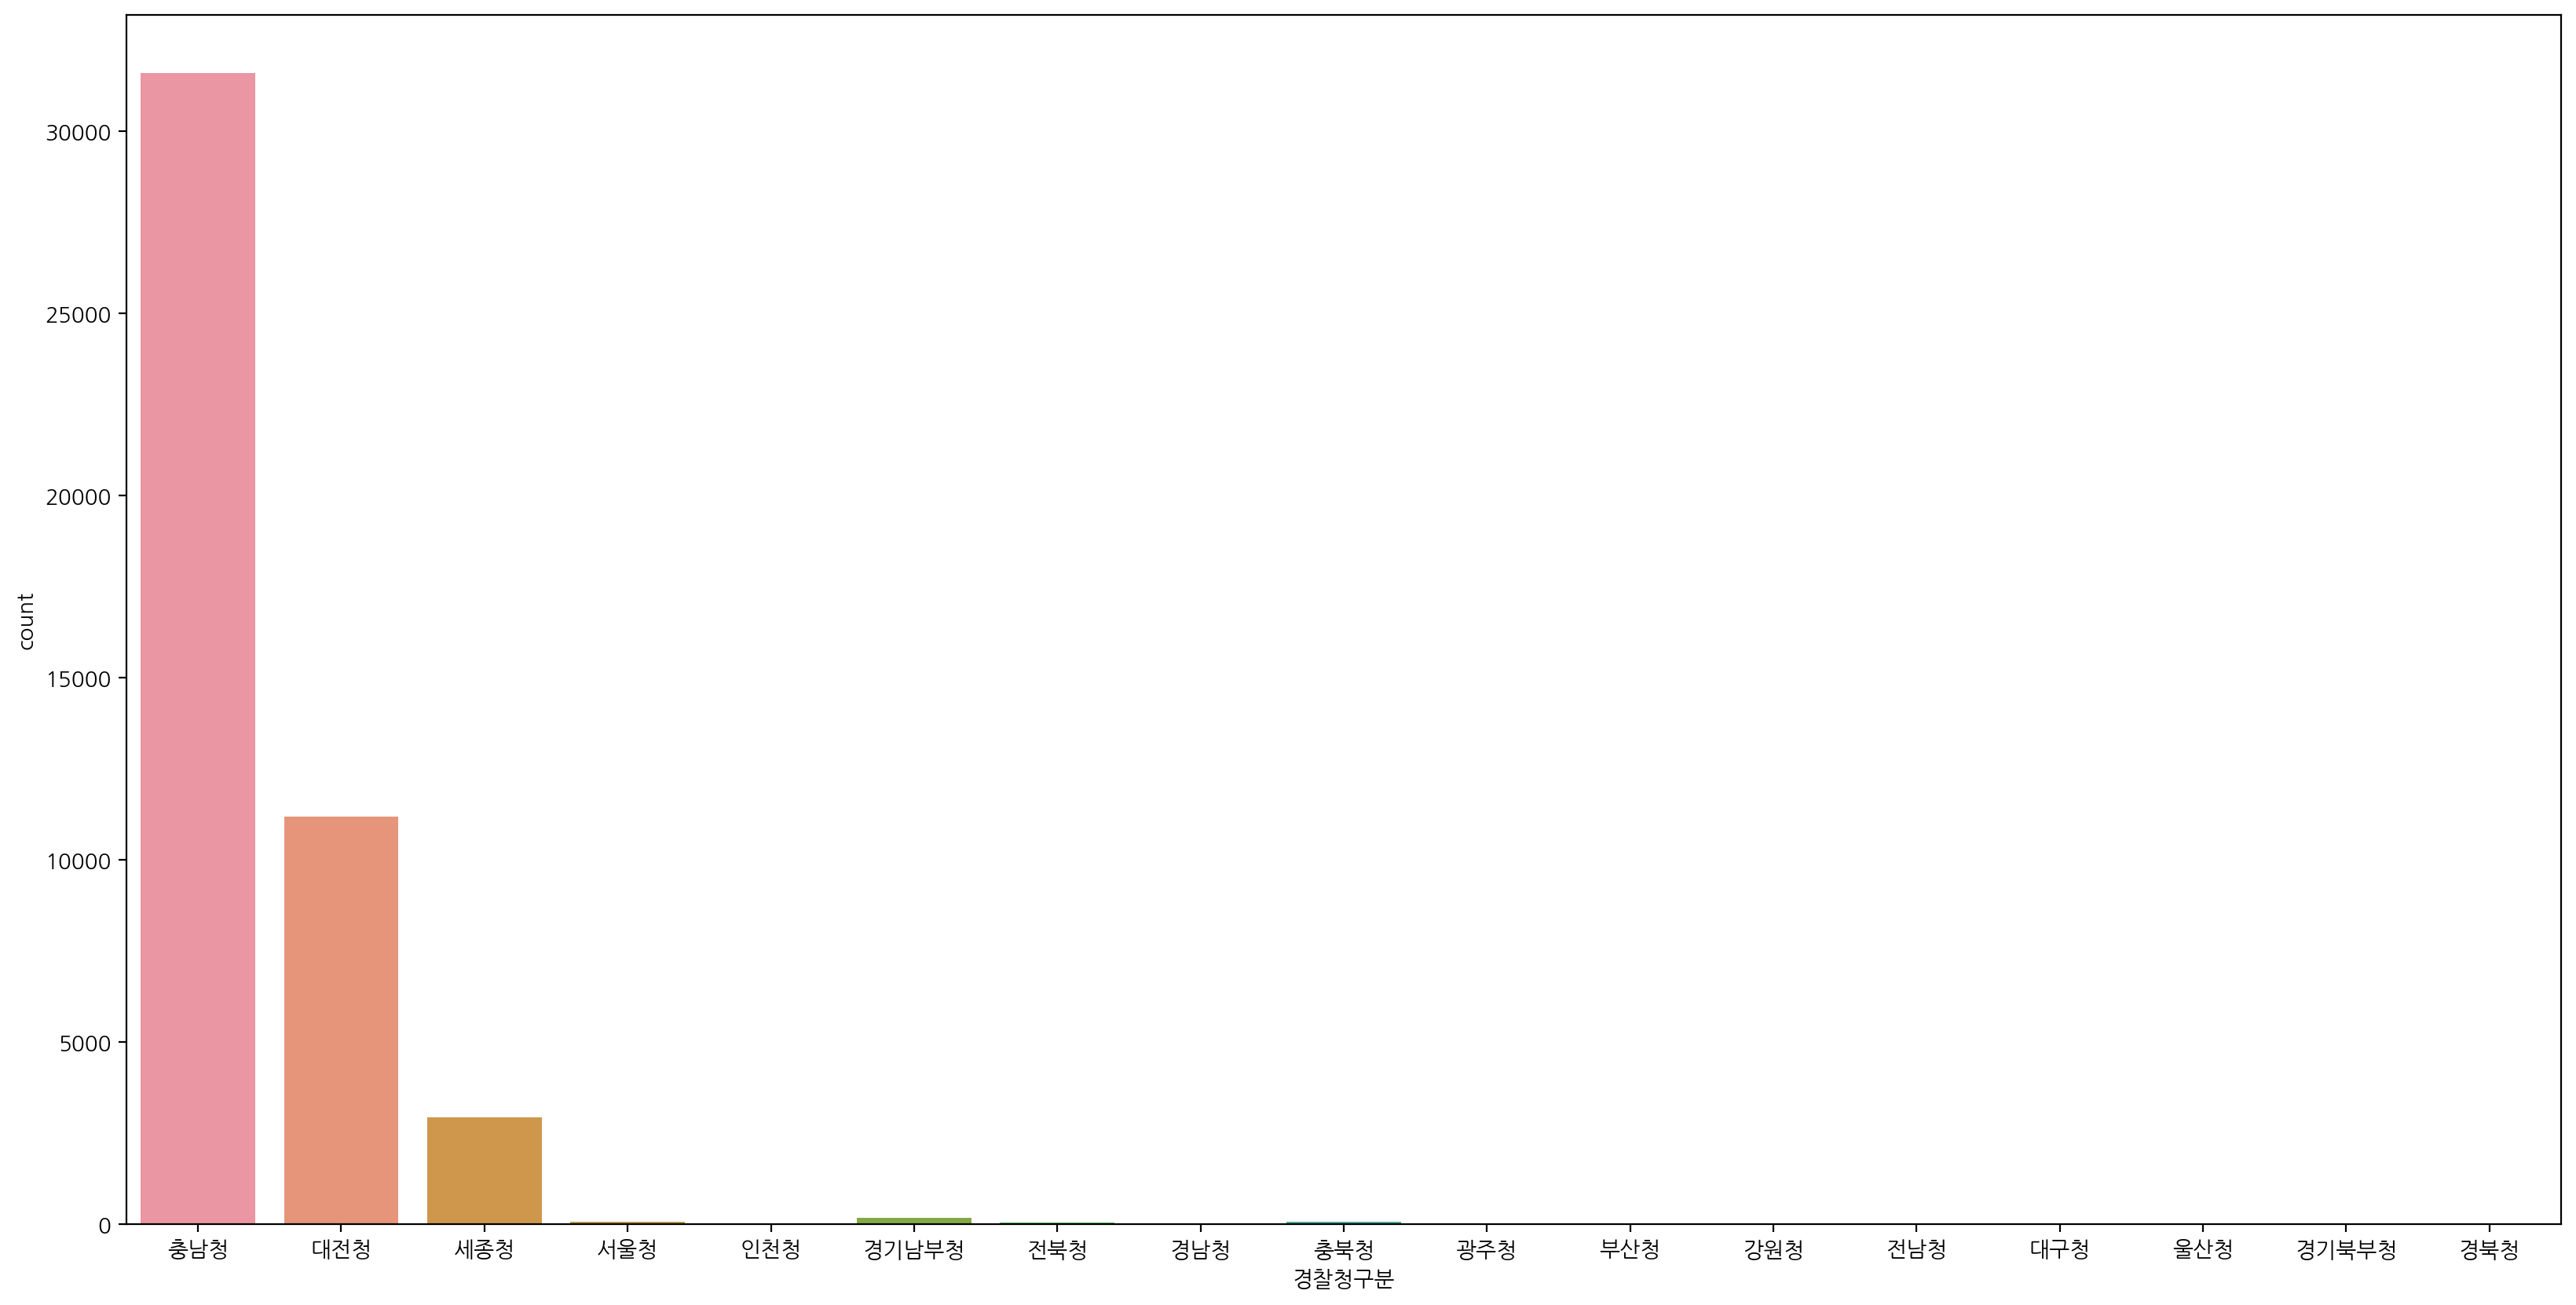

In [10]:
plt.figure(figsize=(20, 10))
sns.countplot(data=df, x='경찰청구분');

# 날짜, 시간 데이터 EDA

## 연도별 EDA

- 2023년도 데이터는 1월까지밖에 없어서 2020~2022만 생각하는게 좋다
- 2020년에서 2021년도 넘어갈때 큰 증가가 있는 것으로 보여진다

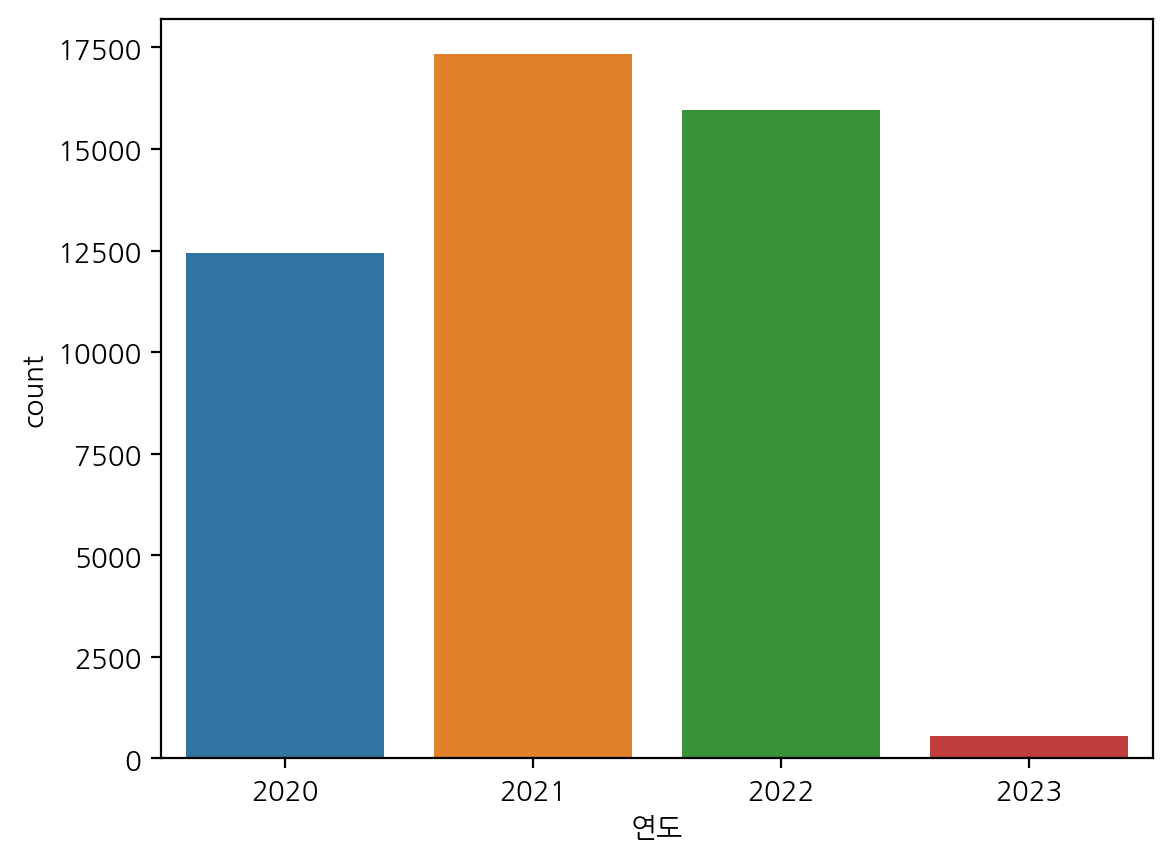

In [11]:
sns.countplot(df, x='연도');

## 월별 EDA

- 월별 보이스피싱 신고 빈도수를 봤을때 특정 월에 보이스피싱이 덜하고 더하고가 없는 거 같다

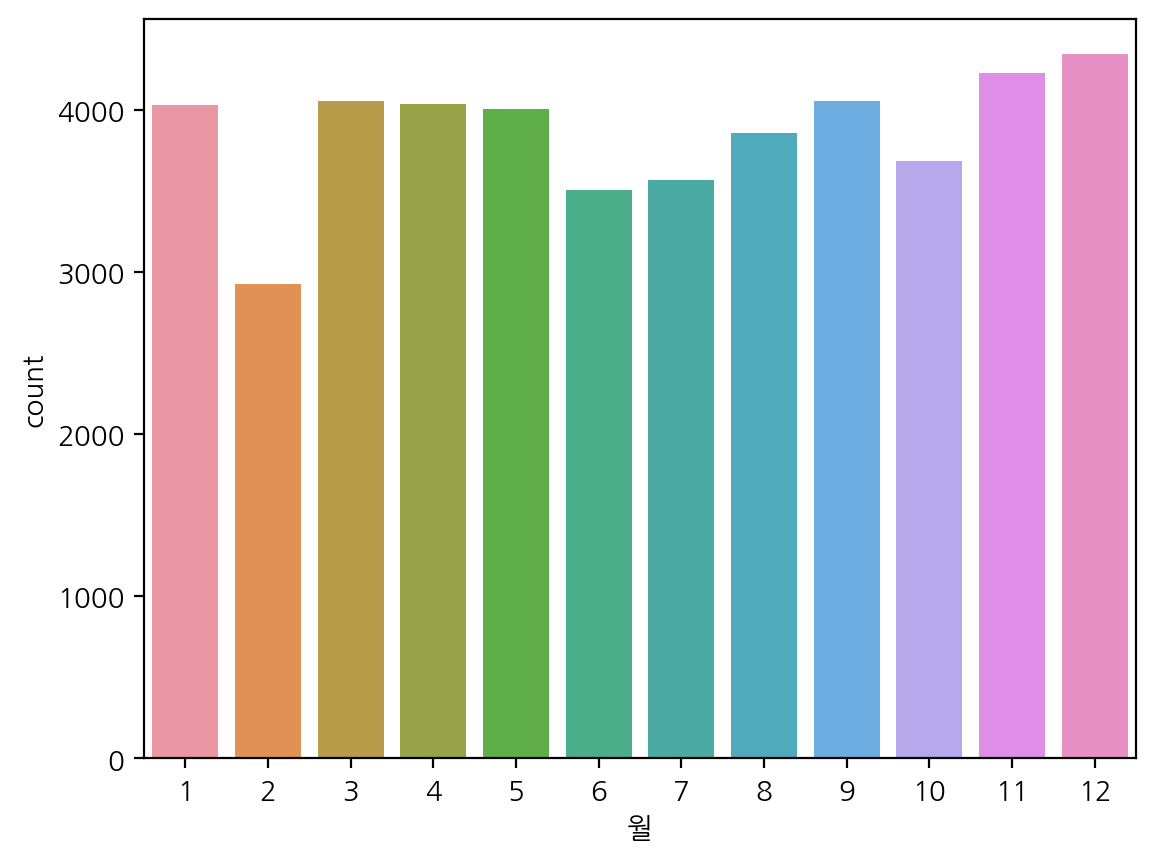

In [12]:
# 월별 보이스피싱 신고 빈도수
sns.countplot(df, x='월');

## 연월별 EDA

- 연월을 기준으로 시계열 분석 및 예측을 할려면 23년 1월 데이터는 없이 진행해야할듯
- 연월에서 보이스피싱이 갑자기 증가했거나, 감소했을때의 뉴스기사를 찾아 원인을 추론해보는 것도 좋을 거 같다

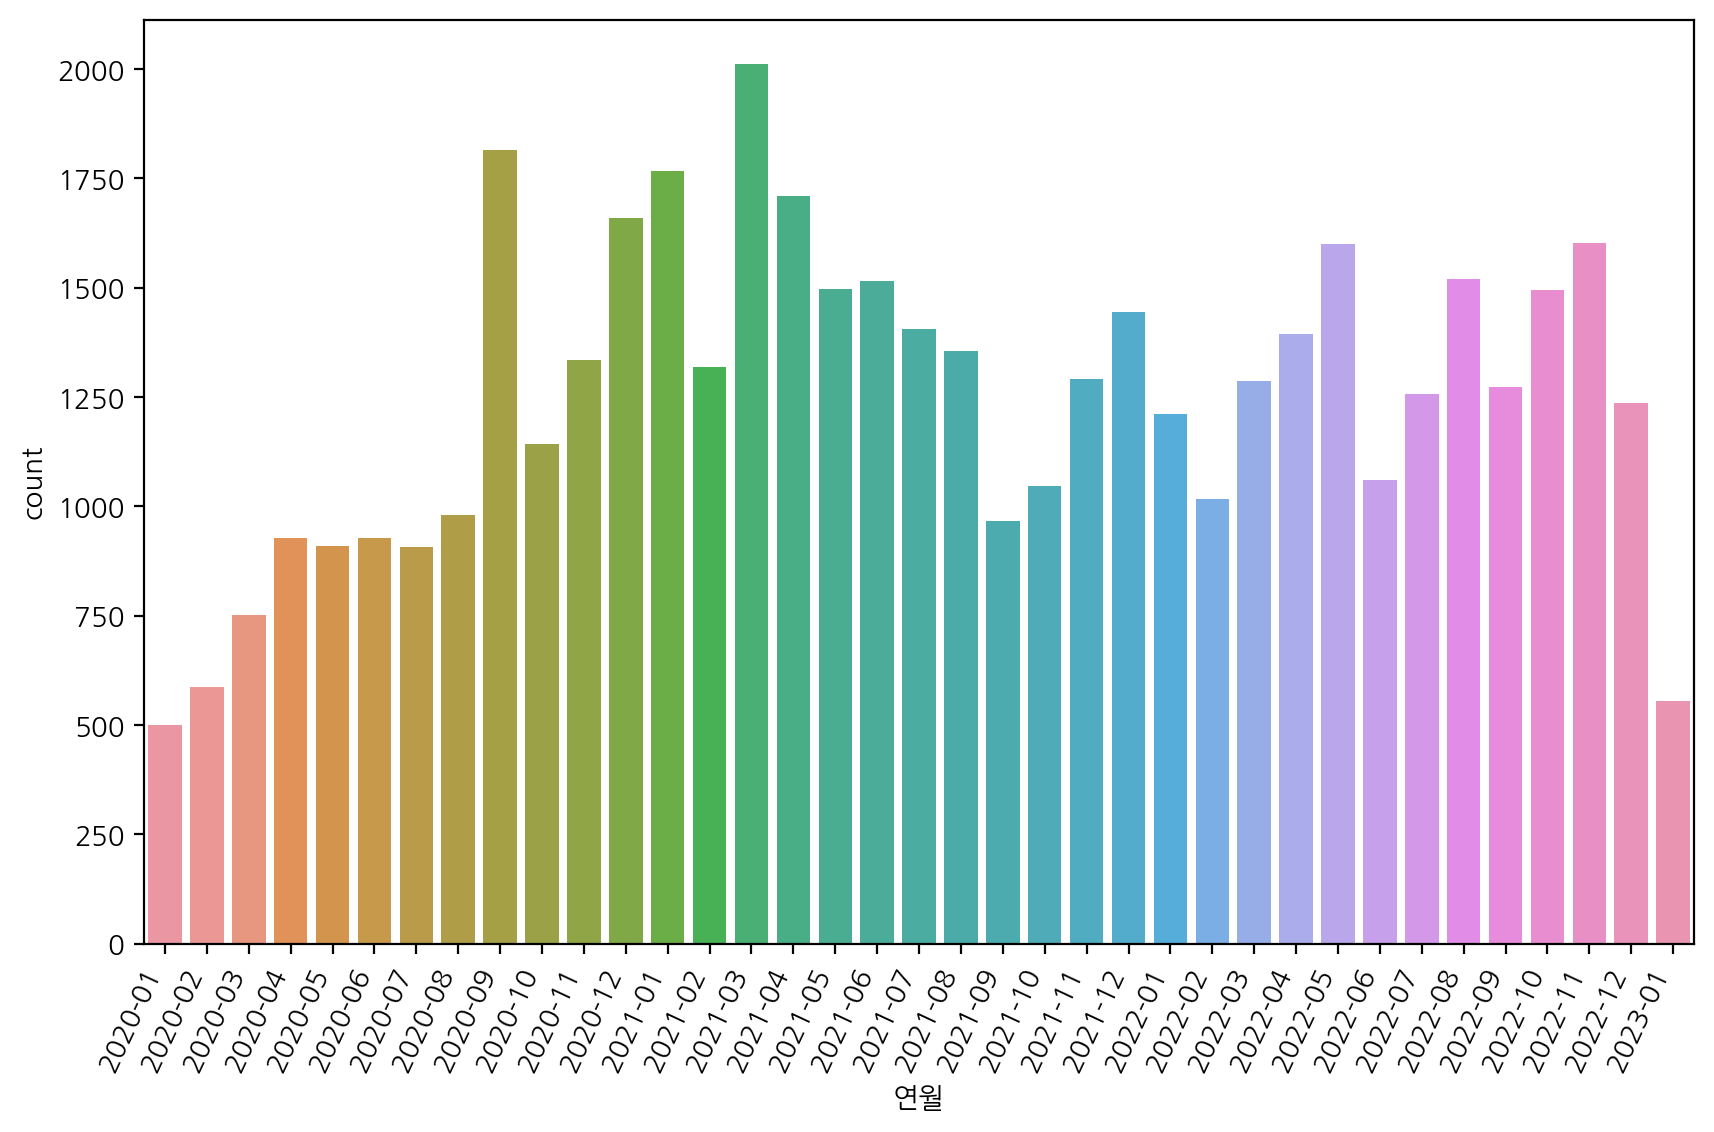

In [13]:
# 연월별 보이스피싱 신고 빈도수
plt.figure(figsize=(10, 6))
sns.countplot(df, x='연월')
plt.xticks(rotation=65, horizontalalignment='right');

## 일자별 EDA

- 일자를 기준으로 시계열 분석 및 예측을 진행한다면 전체다 사용 가능
- 일자를 기준으로 했을때 그렇게 큰 패턴을 찾을 수 없었음

In [14]:
count = pd.DataFrame(df.groupby('일자')['접수완료일시'].count())
count

,접수완료일시
일자,
2020-01-02,29
2020-01-03,31
2020-01-04,6
2020-01-05,2
2020-01-06,14
...,...
2023-01-14,12
2023-01-15,9
2023-01-16,23


## 요일별 EDA

- 요일별 보이스피싱 신고 빈도수의 경우 은행이 안 여는 주말에는 보이스피싱 빈도가 떨어지는 걸로 보인다

In [16]:
weekdata = pd.DataFrame(df.groupby('요일')['접수완료일시'].count())

weeks = ['월','화','수','목',"금","토","일"]
weekdata = weekdata.agg(weeks)
weekdata.columns = ['count']

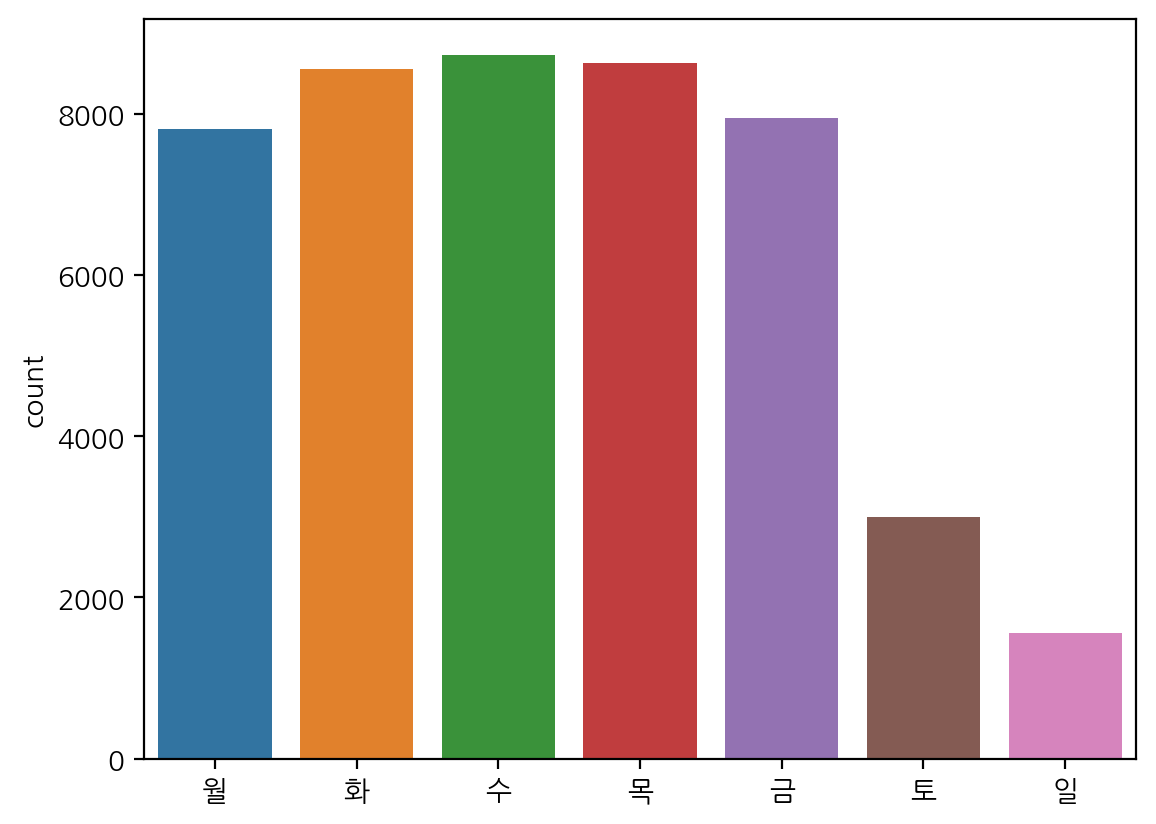

In [17]:
sns.barplot(weekdata, x=weekdata.index, y='count');

## 시간대별 EDA

- 한국기준 밤,새벽시간인 22시부터 7시까지는 보이스피싱 신고가 거의 없는 것으로 보여진다
- 은행이 닫는 4,5시 부터 서서히 감소하는 것도 볼 수 있다

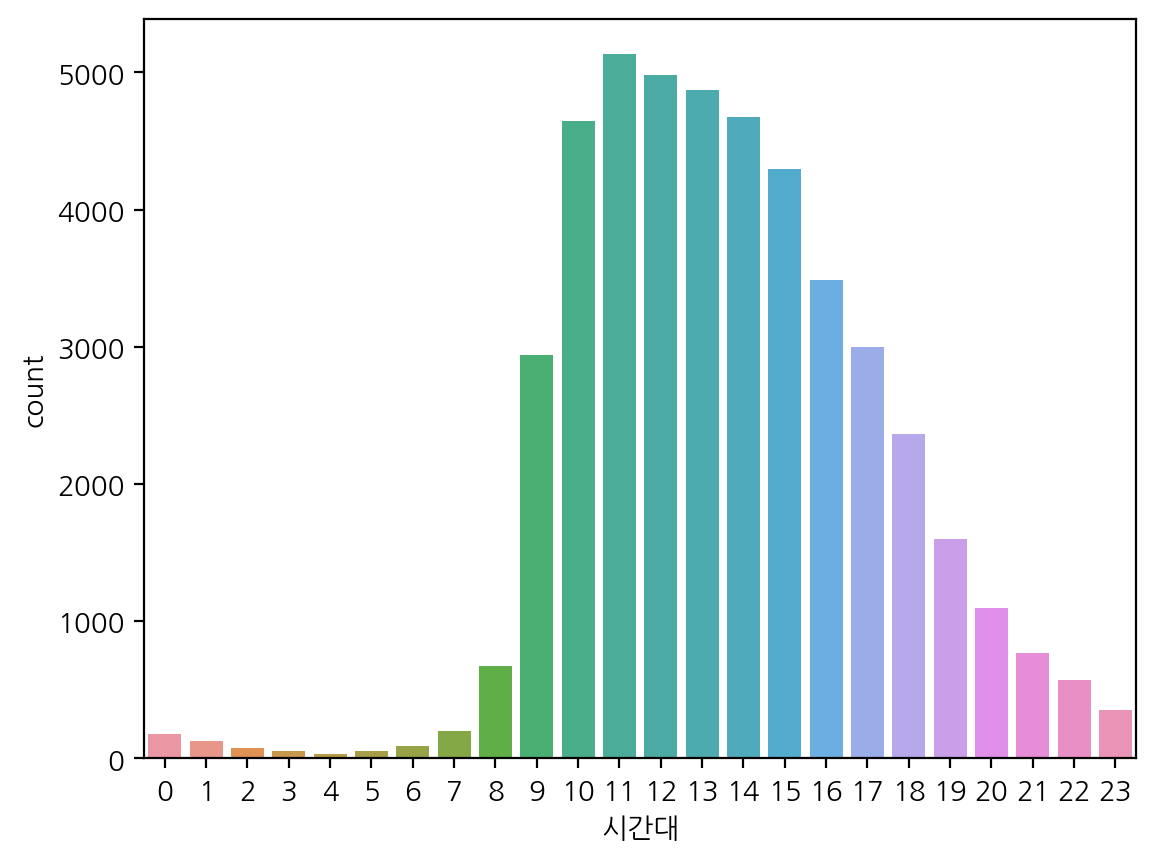

In [18]:
sns.countplot(df, x='시간대');

# 지도 시각화

In [19]:
import folium
from folium.plugins import MarkerCluster


In [20]:
df.head()

,접수부서,접수완료일시,경찰청구분,사건상태,사건종류,신고자 성별,발생지점,발생지 위도,발생지 경도,동일사건여부,연도,월,연월,요일,시간대,일자
3846,충남청,2020-01-02 09:33:49,충남청,종결요청,보이스피싱,불상,충청남도 천안시 서북구 차암동(부성2동) 524,127.104436,36.841583,NaN,2020,1,2020-01,목,9,2020-01-02
3865,충남청,2020-01-02 09:42:45,충남청,종결요청,보이스피싱,불상,충청남도 아산시 풍기동(행정:온양6동) 404-33,127.021875,36.771208,NaN,2020,1,2020-01,목,9,2020-01-02
3960,충남청,2020-01-02 10:23:29,충남청,종결요청,보이스피싱,불상,충청남도 서산시 대산읍 대산리(행정:대산읍) 688-1,126.426100,36.947617,NaN,2020,1,2020-01,목,10,2020-01-02
4016,대전청,2020-01-02 10:46:31,대전청,종결요청,보이스피싱,불상,대전광역시 유성구 대정동(행정:진잠동) 1-4,127.336373,36.317773,NaN,2020,1,2020-01,목,10,2020-01-02
4049,충남청,2020-01-02 11:00:20,충남청,종결요청,보이스피싱,불상,충청남도 논산시 내동(행정:취암동) 1113,127.104068,36.182762,NaN,2020,1,2020-01,목,11,2020-01-02


In [23]:
location = df[['발생지 위도', '발생지 경도']].dropna()
location = location.drop_duplicates()
location.head()

,발생지 위도,발생지 경도
3846,127.104436,36.841583
3865,127.021875,36.771208
3960,126.426100,36.947617
4016,127.336373,36.317773
4049,127.104068,36.182762
